# Chapter 3: Linear Regression for a housing dataset

### Importing the necessary packages

In [4]:
!git clone https://github.com/s7s/machine_learning_1
%cd  machine_learning_1/linear_regression
# https://docs.google.com/presentation/d/e/2PACX-1vRK_dORAlLxlvo72NRIA43T-6FpZLvqwW1ZaB_CL1BFTeN-g7aOC4ACXqI0uQCMmyNG4DanqiVffNPR/pub?start=false&loop=false&delayms=3000

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 236, done.
remote: Counting objects: 100% (236/236), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 236 (delta 112), reused 184 (delta 60), pack-reused 0
Receiving objects: 100% (236/236), 35.88 MiB | 26.88 MiB/s, done.
Resolving deltas: 100% (112/112), done.
/content/machine_learning_1/linear_regression


In [5]:
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [6]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


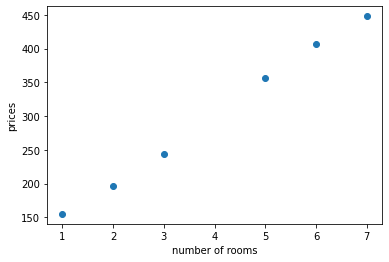

In [ ]:
utils.plot_points(features, labels)

### Coding the tricks

- Simple trick
- Absolute trick
- Square trick

In [ ]:
def simple_trick(base_price, price_per_room, num_rooms, price):
    small_random_1 = random.random()*0.1
    small_random_2 = random.random()*0.1
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price and num_rooms > 0:
        price_per_room += small_random_1
        base_price += small_random_2
    if price > predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    if price < predicted_price and num_rooms > 0:
        price_per_room -= small_random_1
        base_price -= small_random_2
    if price < predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    return price_per_room, base_price

In [ ]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    ## TODO ##
    #implement square_trick and return the new price_per_room and base_price
    # calculate the predicted price then calculate the new price_per_room and base_price
    predicted_price = base_price + price_per_room * num_rooms
    base_price = base_price + learning_rate * (price - predicted_price)
    price_per_room = price_per_room + learning_rate * num_rooms * (price - predicted_price)

    return price_per_room, base_price

In [ ]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    ## TODO ##
    #implement absolute_trick and return the new price_per_room and base_price
    # calculate the predicted price then calculate the new price_per_room and base_price
    predicted_price = base_price + price_per_room * num_rooms
    if price > predicted_price:
      base_price = base_price + learning_rate
      price_per_room = price_per_room + learning_rate * num_rooms
    else:
      base_price = base_price - learning_rate
      price_per_room = price_per_room - learning_rate * num_rooms

    return price_per_room, base_price

### Running the linear regression algorithm

The linear regression algorithm consists of:
- Starting with random weights
- Iterating the square (or simple, or absolute) trick many times.

Price per room: 51.04430678220095
Base price: 91.59448307644864


(51.04430678220095, 91.59448307644864)

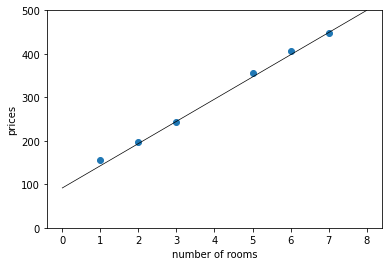

In [ ]:
import random as rd

# We set the random seed in order to always get the same results.
random.seed(0)

def linear_regression(features, labels, trick, learning_rate=0.01, epochs = 1000):
    price_per_room =  random.random() # start with random weight
    base_price =  random.random() # start with random bias
    ## TODO ##
    # for this number of epochs 
    # get a random datasample of our dataset(x,y)
    # using the selected datasample use square_trick fn or absolute_trick fn to update price_per_room and base_price
    for epoch in range(epochs):
      i = random.randint(0,len(features)-1)
      num_rooms = features[i]
      price = labels[i]
      if trick == 'absolute':
        price_per_room , base_price = absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate)
      elif trick == 'square':
        price_per_room , base_price = square_trick(base_price, price_per_room, num_rooms, price, learning_rate)
      else:
        print('please enter a valid trick !')
      
      #utils.draw_line(price_per_room, base_price, starting=0, ending=8)

    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels, 'square', learning_rate = 0.01, epochs = 1000)

### Root mean squared error function

In [ ]:
# The root mean square error function
def rmse(labels, predictions):
    ## TODO ##
    # calculate the root meen square error between the labels and predictions
    length = len(labels)
    error_vector = labels - predictions
    error = 1/length*np.sum((error_vector)**2)
    return error

### Plotting the error function

Price per room: 50.26655103240417
Base price: 98.74678843321146


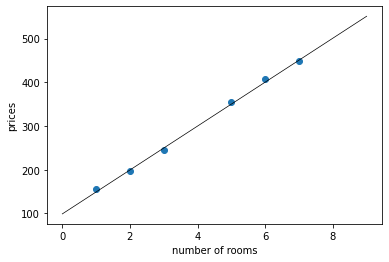

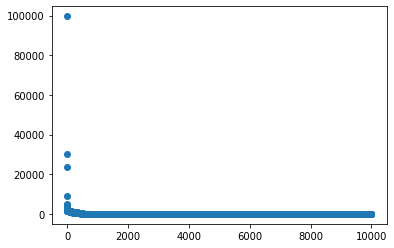

(50.26655103240417, 98.74678843321146)

In [ ]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment one of the following 3 lines to use the simple, the absolute, or the square trick
        #price_per_room, base_price = simple_trick(base_price,
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

### Linear regression using sklearn



In [7]:
## TODO ##
# Use sklearn to implement linear regression that fit our data (features, labels)
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
result = reg.fit(features.reshape(-1,1), labels)
result.score(features.reshape(-1,1), labels)

0.9979437166148433

In [8]:
## TODO ##
# print the coefficients and bias of this model
print("weights:",reg.coef_)
print("bias:",reg.intercept_)

weights: [50.39285714]
bias: 99.59523809523819


In [9]:
## TODO ##
# use this model to predict the price of house that contains 4 rooms
reg.predict([[4]])


array([301.16666667])

### Normal Equation



In [ ]:
def Normal_Equation(features,labels):
    ## TODO ##
    # Use normal equation to get the weights
    # don't forget to concatenate ones to the features
    X = np.vstack((np.ones((len(features))),features))
    W = np.linalg.inv(X@X.T)@X@labels
    return W

W = Normal_Equation(features,labels)
print(W)

[99.5952381  50.39285714]


### Real Example (Predict fuel efficiency)

In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

#### Get data

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [ ]:
dataset = raw_dataset.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


#### Clean data

In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [ ]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

In [ ]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


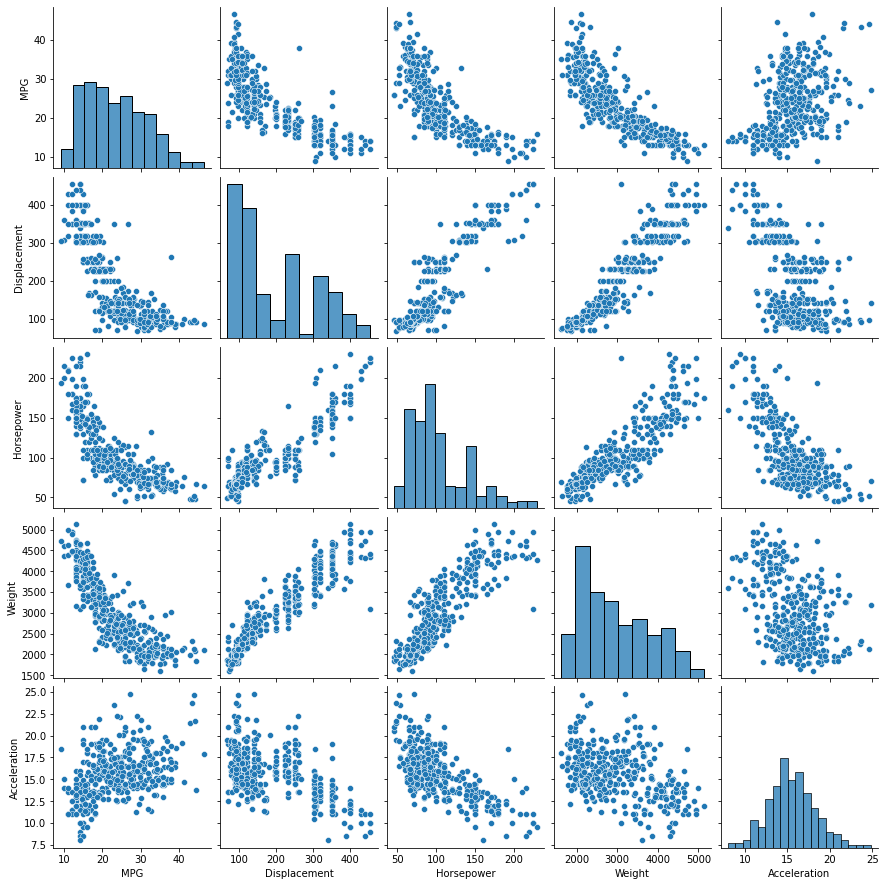

In [ ]:
sns.pairplot(dataset[['MPG','Displacement', 'Horsepower', 'Weight','Acceleration']])

In [ ]:
datasetXsingle=dataset[['Horsepower']]
datasetXMulti=dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Europe','Japan','USA']]
datasetY=dataset[['MPG']]

In [ ]:
# use single-variable input to fit linear regression model
result = reg.fit(datasetXsingle, datasetY)
result.score(datasetXsingle, datasetY)

0.6059482578894348

In [ ]:
# use multi-variable input to fit linear regression model
result = reg.fit(datasetXMulti, datasetY)
result.score(datasetXMulti, datasetY)

0.8241994699119173

In [ ]:
# use Normalized mlti-variable input to fit linear regression model